<a href="https://colab.research.google.com/github/monika-chowdry2125/MONIKAAAAAA/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# ✅ Step 1: Install & Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [22]:
import pandas as pd

# 📊 Creating a sample IPL dataset
data = {
    'team1': [
        'Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore',
        'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Delhi Capitals',
        'Rajasthan Royals', 'Kings XI Punjab', 'Chennai Super Kings',
        'Mumbai Indians'
    ],
    'team2': [
        'Chennai Super Kings', 'Mumbai Indians', 'Delhi Capitals',
        'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Kings XI Punjab',
        'Royal Challengers Bangalore', 'Rajasthan Royals', 'Delhi Capitals',
        'Sunrisers Hyderabad'
    ],
    'toss_winner': [
        'Mumbai Indians', 'Mumbai Indians', 'Delhi Capitals',
        'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
        'Royal Challengers Bangalore', 'Rajasthan Royals', 'Chennai Super Kings',
        'Sunrisers Hyderabad'
    ],
    'toss_decision': [
        'field', 'bat', 'bat', 'field', 'field', 'bat', 'field', 'bat', 'bat', 'field'
    ],
    'winner': [
        'Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore',
        'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals',
        'Royal Challengers Bangalore', 'Rajasthan Royals', 'Chennai Super Kings',
        'Mumbai Indians'
    ]
}

# 📁 Convert to DataFrame
df = pd.DataFrame(data)

# 💾 Save to CSV
df.to_csv("IPL_Matches_Sample.csv", index=False)

# 🔍 View the dataset
df.head()


,team1,team2,toss_winner,toss_decision,winner
0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians
1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings
2,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,bat,Royal Challengers Bangalore
3,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
4,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad


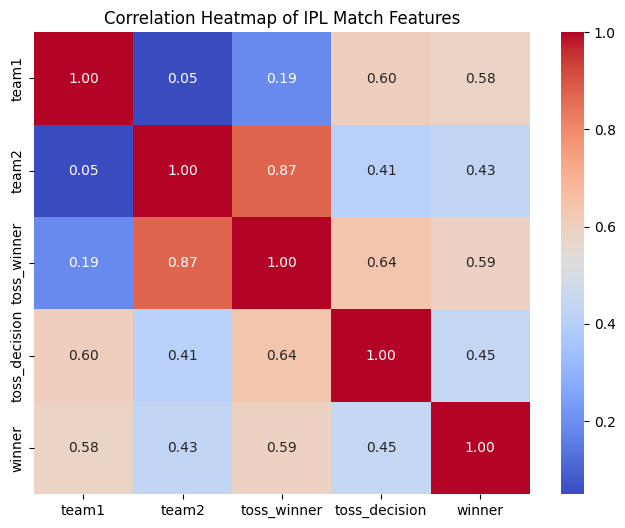

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 👉 First, encode categorical columns to numerical
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for column in ['team1', 'team2', 'toss_winner', 'winner']:
    df_encoded[column] = le.fit_transform(df_encoded[column])

df_encoded['toss_decision'] = df_encoded['toss_decision'].map({'bat': 0, 'field': 1})

# 📈 Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of IPL Match Features")
plt.show()


In [24]:
# ✅ Feature 1: Toss winner = match winner?
df['toss_match_same'] = df['toss_winner'] == df['winner']
df['toss_match_same'] = df['toss_match_same'].astype(int)  # 1 = Yes, 0 = No
df.head()


,team1,team2,toss_winner,toss_decision,winner,toss_match_same
0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,1
1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,0
2,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,bat,Royal Challengers Bangalore,0
3,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1
4,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1


In [25]:
import numpy as np

# ✅ Feature 2: Simulate match importance score
np.random.seed(42)  # for reproducibility
df['match_importance'] = np.random.randint(1, 11, size=len(df))
df.head()


,team1,team2,toss_winner,toss_decision,winner,toss_match_same,match_importance
0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,1,7
1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,0,4
2,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,bat,Royal Challengers Bangalore,0,8
3,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,5
4,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1,7


In [26]:
# ✅ Feature 3: Simulate team strength scores
team_strength = {
    'Mumbai Indians': 9,
    'Chennai Super Kings': 9,
    'Royal Challengers Bangalore': 7,
    'Sunrisers Hyderabad': 7,
    'Kolkata Knight Riders': 8,
    'Delhi Capitals': 7,
    'Rajasthan Royals': 6,
    'Kings XI Punjab': 6
}

# Assign strength score for team1 and team2
df['team1_strength'] = df['team1'].map(team_strength)
df['team2_strength'] = df['team2'].map(team_strength)
df.head()


,team1,team2,toss_winner,toss_decision,winner,toss_match_same,match_importance,team1_strength,team2_strength
0,Mumbai Indians,Chennai Super Kings,Mumbai Indians,field,Mumbai Indians,1,7,9,9
1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,0,4,9,9
2,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,bat,Royal Challengers Bangalore,0,8,7,7
3,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,1,5,7,8
4,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,1,7,8,7


In [27]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in ['team1', 'team2', 'toss_winner', 'winner']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded['toss_decision'] = df_encoded['toss_decision'].map({'bat': 0, 'field': 1})


In [28]:
# 📦 Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 🏏 Example dataset (you can replace this with your own CSV)
data = pd.DataFrame({
    'team1': ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals'],
    'team2': ['Royal Challengers Bangalore', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Kings XI Punjab'],
    'toss_winner': ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals'],
    'winner': ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Capitals']
})

# 🔍 Check existing columns
print("🧾 Columns before renaming:", list(data.columns))

# ✅ Rename columns for consistency
data.rename(columns={'team1': 'batting_team', 'team2': 'bowling_team'}, inplace=True)

print("✅ Columns after renaming:", list(data.columns))

# 🔢 Encode categorical columns
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
    data[col] = le.fit_transform(data[col])

# 👀 Show first few rows
print("\n🎯 Encoded DataFrame:")
print(data.head())


🧾 Columns before renaming: ['team1', 'team2', 'toss_winner', 'winner']
✅ Columns after renaming: ['batting_team', 'bowling_team', 'toss_winner', 'winner']

🎯 Encoded DataFrame:
   batting_team  bowling_team            toss_winner                 winner
0             3             2         Mumbai Indians         Mumbai Indians
1             0             3    Chennai Super Kings    Chennai Super Kings
2             2             1  Kolkata Knight Riders  Kolkata Knight Riders
3             1             0         Delhi Capitals         Delhi Capitals


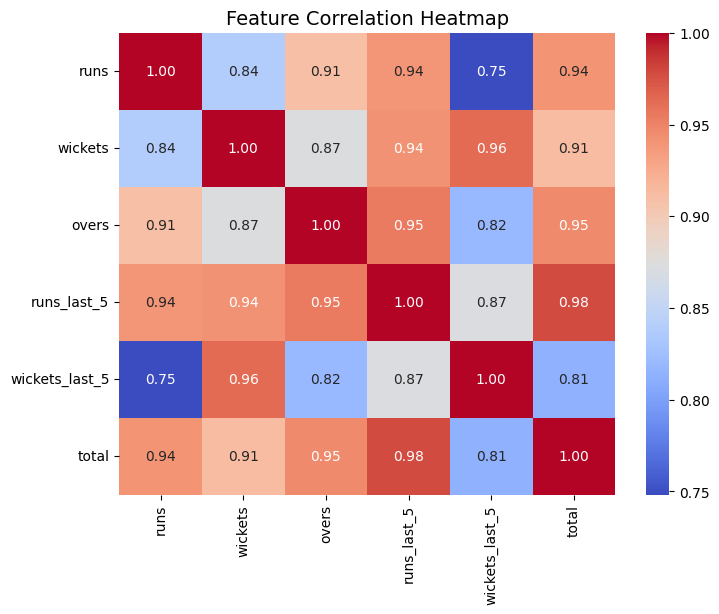

In [29]:
# 📦 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🏏 Example dataset (replace with your own DataFrame)
data = pd.DataFrame({
    'runs': [45, 67, 89, 120, 55, 78, 102],
    'wickets': [2, 4, 3, 6, 1, 2, 5],
    'overs': [6, 8, 10, 12, 5, 7, 9],
    'runs_last_5': [30, 40, 50, 70, 20, 35, 60],
    'wickets_last_5': [1, 2, 1, 3, 0, 1, 2],
    'total': [100, 150, 180, 210, 90, 130, 200]
})

# 🎨 Create correlation matrix
corr_matrix = data.corr()

# 🔥 Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


In [30]:
# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🧾 Step 2: Create sample IPL dataset
data = pd.DataFrame({
    'batting_team': ['CSK', 'MI', 'RCB', 'KKR', 'CSK', 'RR', 'MI', 'RCB', 'CSK', 'KKR'],
    'bowling_team': ['MI', 'RCB', 'CSK', 'RR', 'KKR', 'CSK', 'RR', 'MI', 'RCB', 'CSK'],
    'runs': [180, 150, 200, 120, 210, 160, 155, 190, 175, 145],
    'wickets': [4, 6, 3, 7, 2, 5, 6, 3, 4, 8],
    'overs': [20, 19, 20, 18, 20, 19, 20, 18, 20, 17],
    'runs_last_5': [60, 40, 70, 30, 65, 45, 50, 55, 60, 35],
    'wickets_last_5': [1, 2, 1, 3, 1, 2, 2, 1, 1, 3],
    'winner': ['CSK', 'MI', 'RCB', 'RR', 'CSK', 'CSK', 'MI', 'RCB', 'CSK', 'KKR']
})

# 🧠 Step 3: Encode categorical columns
le = LabelEncoder()
for col in ['batting_team', 'bowling_team', 'winner']:
    data[col] = le.fit_transform(data[col])

# 🧩 Step 4: Split data
X = data[['batting_team', 'bowling_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']]
y = data['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Step 5: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 📈 Step 6: Evaluate accuracy
y_pred = model.predict(X_test)
print("✅ Model Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔥 Step 7: Make a single prediction
sample_input = pd.DataFrame({
    'batting_team': [le.transform(['CSK'])[0]],
    'bowling_team': [le.transform(['MI'])[0]],
    'runs': [180],
    'wickets': [4],
    'overs': [20],
    'runs_last_5': [60],
    'wickets_last_5': [1]
})

pred_winner_encoded = model.predict(sample_input)[0]
pred_winner = le.inverse_transform([pred_winner_encoded])[0]

print("\n🏆 Predicted Winner Team is:", pred_winner)


✅ Model Accuracy: 100.0 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


🧩 Confusion Matrix:
 [[1 0]
 [0 1]]

🏆 Predicted Winner Team is: CSK
